# 1. Load the ArtBenchDataset

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms, models

import torch.nn as nn

In [2]:
batch_size = 32

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
train_data_path= "artbench-10-imagefolder-split/train"
test_data_path= "artbench-10-imagefolder-split/test"

In [5]:
trainset = datasets.ImageFolder(root=train_data_path, transform = transform)
testset = datasets.ImageFolder(root=test_data_path, transform = transform)

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

## Sanity Check

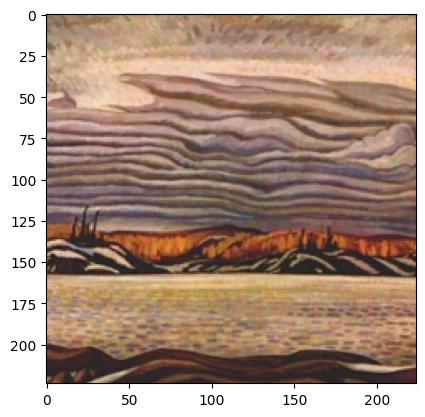

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    img = img.numpy().transpose((1, 2, 0))
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)  # clip the image to be between 0 and 1
    plt.imshow(img)
    plt.show()
    
imshow(trainset[0][0]) 

In [8]:
class_to_idx = trainset.class_to_idx
print(class_to_idx)
classes = (
    'art_nouveau', 'baroque', 'expressionism', 'impressionism', 'post_impressionism', 'realism', 'renaissance', 'romanticism', 'surrealism', 'ukiyo_e'
)

# {'art_nouveau': 0, 'baroque': 1, 'expressionism': 2, 'impressionism': 3, 'post_impressionism': 4, 'realism': 5, 'renaissance': 6, 'romanticism': 7, 'surrealism': 8, 'ukiyo_e': 9}

{'art_nouveau': 0, 'baroque': 1, 'expressionism': 2, 'impressionism': 3, 'post_impressionism': 4, 'realism': 5, 'renaissance': 6, 'romanticism': 7, 'surrealism': 8, 'ukiyo_e': 9}


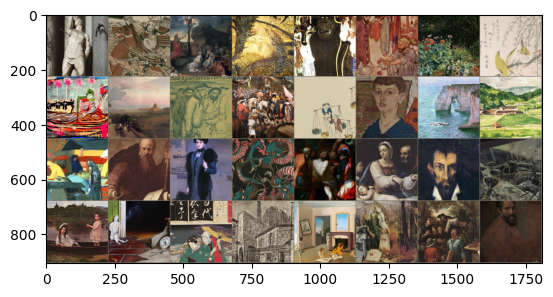

renaissance ukiyo_e baroque surrealism art_nouveau art_nouveau realism ukiyo_e expressionism romanticism realism renaissance ukiyo_e post_impressionism impressionism impressionism post_impressionism renaissance impressionism ukiyo_e baroque renaissance realism expressionism realism surrealism ukiyo_e expressionism surrealism surrealism baroque renaissance


In [9]:
# get some random training images
images, labels = next(iter(trainloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# 2. Modify and Load ResNet50

In [10]:
# # Load a pre-trained ResNet50 model
# model = models.resnet50(pretrained=True)

# # Modify the final fully connected layer for 10 output classes
# model.fc = nn.Linear(model.fc.in_features, 10)

# # Transfer model to GPU if available
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model.to(device)


# 3. Retrain ResNet50 on ArtBench

In [11]:
# num_epochs = 20

In [12]:
# import torch.optim as optim
# import time

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# for epoch in range(num_epochs):  # Loop over the dataset multiple times
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     start_time = time.time()

#     for i, data in enumerate(trainloader, 0):
#         # Get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data[0].to(device), data[1].to(device)

#         # Zero the parameter gradients
#         optimizer.zero_grad()

#         # Forward + backward + optimize
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # Update statistics
#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#         # Print detailed statistics
#         if i % 200 == 199:    # Print every 200 mini-batches
#             current_lr = optimizer.param_groups[0]['lr']
#             print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], '
#                   f'Loss: {running_loss / 200:.3f}, '
#                   f'Accuracy: {100 * correct / total:.2f}%, '
#                   f'LR: {current_lr}')
#             running_loss = 0.0
#             correct = 0
#             total = 0

#     epoch_duration = time.time() - start_time
#     print(f'End of Epoch {epoch + 1}, Duration: {epoch_duration:.2f} seconds')

# print('Finished Training')


## Save training state 

In [13]:
# torch.save(model.state_dict(), 'ResNet50_retrained_artbench10.pth')

In [14]:
# torch.save({
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'epoch': epoch,
#     # Include any other items you might need
# }, 'model_checkpoint.pth')


## 3.1 Load Trained Model

In [15]:
import torch
import torchvision.models as models
import torch.nn as nn

# Create an instance of the model architecture
# (Make sure this matches the architecture of the trained model)
retrained_model = models.resnet50(pretrained=False)

# Modify the final fully connected layer for 10 output classes
retrained_model.fc = nn.Linear(retrained_model.fc.in_features, 10)

# Path to the saved model
retrained_model_path = './ResNet50_retrained_artbench10.pth'

# Load the saved state dictionary into the model
retrained_model.load_state_dict(torch.load(retrained_model_path))

# If using a GPU, transfer the model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
retrained_model.to(device)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 3.2 Evaluate model accuracy

In [16]:
# # Function to calculate accuracy
# def calculate_accuracy(model, dataloader):
#     correct = 0
#     total = 0
#     retrained_model.to(device)
#     with torch.no_grad():
#         for data in dataloader:
#             images, labels = data[0].to(device), data[1].to(device)
#             outputs = retrained_model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
            
#     retrained_model.to('cpu')

#     return 100 * correct / total

# # Evaluate the model
# retrained_model.eval()  # Set the model to evaluation mode
# accuracy = calculate_accuracy(retrained_model, testloader)
# print(f'Accuracy of the model on the artBench10 test images: {accuracy}%')



In [17]:
# # prepare to count predictions for each class
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}

# # again no gradients needed
# with torch.no_grad():
#     retrained_model.to(device)
#     for data in testloader:
#         inputs, labels = data[0].to(device), data[1].to(device)
#         outputs = retrained_model(inputs)
#         _, predictions = torch.max(outputs, 1)
#         # collect the correct predictions for each class
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label]] += 1
#             total_pred[classes[label]] += 1
    
#     retrained_model.to('cpu')

# # print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# 4. Capture activations and extract features at different layers

In [18]:
class FeatureExtractor():
    def __init__(self):
        self.features = []

    def hook_fn(self, module, input, output):
        self.features.append(output)

    def clear(self):
        self.features = []


In [19]:
feature_extractor = FeatureExtractor()

retrained_model.layer1.register_forward_hook(feature_extractor.hook_fn)
retrained_model.layer2.register_forward_hook(feature_extractor.hook_fn)
retrained_model.layer3.register_forward_hook(feature_extractor.hook_fn)
retrained_model.layer4.register_forward_hook(feature_extractor.hook_fn)


## 4.1 All features

Takes up too much RAM

In [20]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [ ]:
# # Prepare to store features and labels
# all_features = []
# all_labels = []

# # Iterate over the trainloader
# for images, labels_tensor in testloader:
#     images = images.to(device)
#     labels_tensor = labels_tensor.cpu().numpy().flatten()  # Flatten labels

#     # Clear previous features
#     feature_extractor.clear()

#     # Forward pass
#     retrained_model(images)

#     # Store features and labels
#     all_features.append([feature.cpu().detach().numpy() for feature in feature_extractor.features])
#     all_labels.extend(labels_tensor)


## 4.2 Features from just 1st batch

In [21]:
# Get the first batch of data
images, labels = next(iter(testloader))
images = images.to(device)

# Clearing previous features (if any)
feature_extractor.clear()

# Forward pass to extract features
retrained_model(images)

# Now, feature_extractor.features contains the outputs of the hooked layers for the first batch

# Flatten and prepare labels
labels = labels.cpu().numpy().flatten()

In [22]:
labels

array([8, 6, 4, 7, 4, 5, 9, 1, 5, 2, 1, 1, 8, 3, 5, 6, 9, 5, 8, 0, 6, 9,
       9, 7, 7, 9, 4, 9, 2, 3, 8, 9])

# 5. Train Linear Probing Classifiers on Extracted Features

## 5.1 Train on all features

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Convert all_labels to a numpy array for consistency
# all_labels = np.array(all_labels)

# accuracies = []

# # Assuming each element in all_features is a list of features for each layer
# for layer in range(len(all_features[0])):
#     # Extract layer-specific features from all batches
#     layer_features = np.concatenate([batch[layer] for batch in all_features])

#     # Flatten the features for logistic regression
#     flattened_features = layer_features.reshape(layer_features.shape[0], -1)

#     # Ensure alignment of features and labels
#     if flattened_features.shape[0] != len(all_labels):
#         print(f"Skipping layer {layer + 1} due to mismatch in data.")
#         continue

#     # Splitting the dataset into training and testing sets
#     split = int(0.8 * len(flattened_features))
#     X_train, X_test = flattened_features[:split], flattened_features[split:]
#     y_train, y_test = all_labels[:split], all_labels[split:]

#     # Initialize the Logistic Regression model
#     lr_model = LogisticRegression(max_iter=1000)

#     # Train the model
#     lr_model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = lr_model.predict(X_test)

#     # Calculate accuracy
#     acc = accuracy_score(y_test, y_pred)
#     accuracies.append(acc)

#     print(f"Layer {layer + 1}: Accuracy = {acc:.4f}")

## 5.2 Train on just 1st batch feature

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracies = []

# Process features for each layer
for layer_features in feature_extractor.features:
    # Flatten the features for logistic regression
    flattened_features = layer_features.cpu().detach().numpy().reshape(layer_features.shape[0], -1)

    # Splitting the dataset into training and testing sets (considering the small dataset size)
    split = int(0.8 * len(flattened_features))
    X_train, X_test = flattened_features[:split], flattened_features[split:]
    y_train, y_test = labels[:split], labels[split:]

    # Initialize the Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Train the model
    lr_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lr_model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Layer Accuracy = {acc:.4f}")

    #

Layer Accuracy = 0.1429
Layer Accuracy = 0.0000
Layer Accuracy = 0.1429
Layer Accuracy = 0.4286


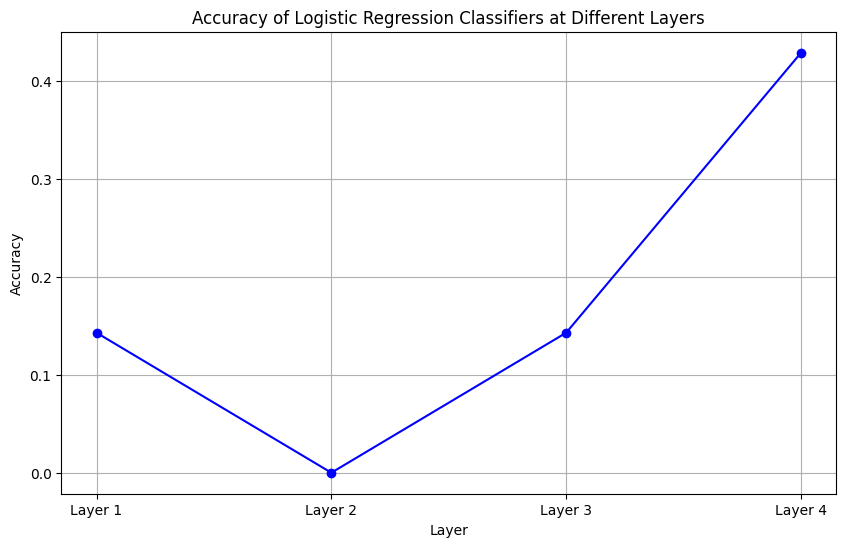

In [24]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of Logistic Regression Classifiers at Different Layers')
plt.xlabel('Layer')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(accuracies)), labels=[f'Layer {i+1}' for i in range(len(accuracies))])
plt.grid(True)
plt.show()



# 7. PCA

## 7.1 using just first batch features

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [27]:
images, labels = next(iter(testloader))
images = images.to(device)

# Clear previous features (if any)
feature_extractor.clear()

# Forward pass to extract features
retrained_model(images)

tensor([[ -5.3209, -13.1562,   0.0547,   4.5913,  -1.3708,   0.1388, -22.9099,
          -3.2164,  -9.4273, -24.4173],
        [-12.0001, -24.1617, -11.3857, -16.0562, -14.4652, -17.1935, -20.5167,
         -14.9031, -11.3236,   1.4640],
        [-14.1260,  -8.4376, -15.0744, -17.7981,  -7.1345,  -2.4192,   4.9593,
         -13.0670,  -8.4599, -33.3381],
        [ -8.7538, -10.7252,  -3.9854,  -1.3401,  -3.1257,   2.3196, -10.2742,
          -3.7695, -15.3277,  -9.0160],
        [-10.6560, -10.9136,  -5.8718, -14.1724, -14.2980,   1.3090, -10.7297,
          -6.7345,  -4.9947, -18.6656],
        [ -8.1931,   3.2130, -12.7776, -10.3513, -22.7065,  -8.9076,   0.2936,
           0.4064,  -6.1647, -19.4233],
        [ -9.2503, -13.9416,  -2.8851,   2.0438,   4.4050,  -4.9068, -14.8840,
         -10.2237, -11.8368, -26.6603],
        [ -8.6992,   0.3415,  -4.4651,  -2.0187,  -0.9405,   1.5830,  -5.3900,
          -0.8926, -10.2706, -19.2977],
        [ -0.9651, -14.4440,  -1.7181,  -3.4668,

In [28]:


# Flatten features from each layer
flattened_features = [layer_feature.cpu().detach().numpy().reshape(layer_feature.shape[0], -1)
                      for layer_feature in feature_extractor.features]

# Flatten and prepare labels for plotting
labels = labels.cpu().numpy().flatten()

In [29]:
for i, layer_output in enumerate(feature_extractor.features):
    print(f"Layer {i + 1} output shape (before flattening): {layer_output.shape}")


Layer 1 output shape (before flattening): torch.Size([32, 256, 56, 56])
Layer 2 output shape (before flattening): torch.Size([32, 512, 28, 28])
Layer 3 output shape (before flattening): torch.Size([32, 1024, 14, 14])
Layer 4 output shape (before flattening): torch.Size([32, 2048, 7, 7])


In [30]:
flattened_features = [layer_output.cpu().detach().numpy().reshape(layer_output.shape[0], -1)
                      for layer_output in feature_extractor.features]

In [31]:
# Mapping of class indices to class names
class_names = {0: 'art_nouveau', 1: 'baroque', 2: 'expressionism', 3: 'impressionism', 4: 'post_impressionism', 5: 'realism', 6: 'renaissance', 7: 'romanticism', 8: 'surrealism', 9:'ukiyo_e'}

# Convert tensor labels to actual class names
readable_labels = np.array([class_names[label.item()] for label in labels])


/tmp/ipykernel_116/1915323138.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


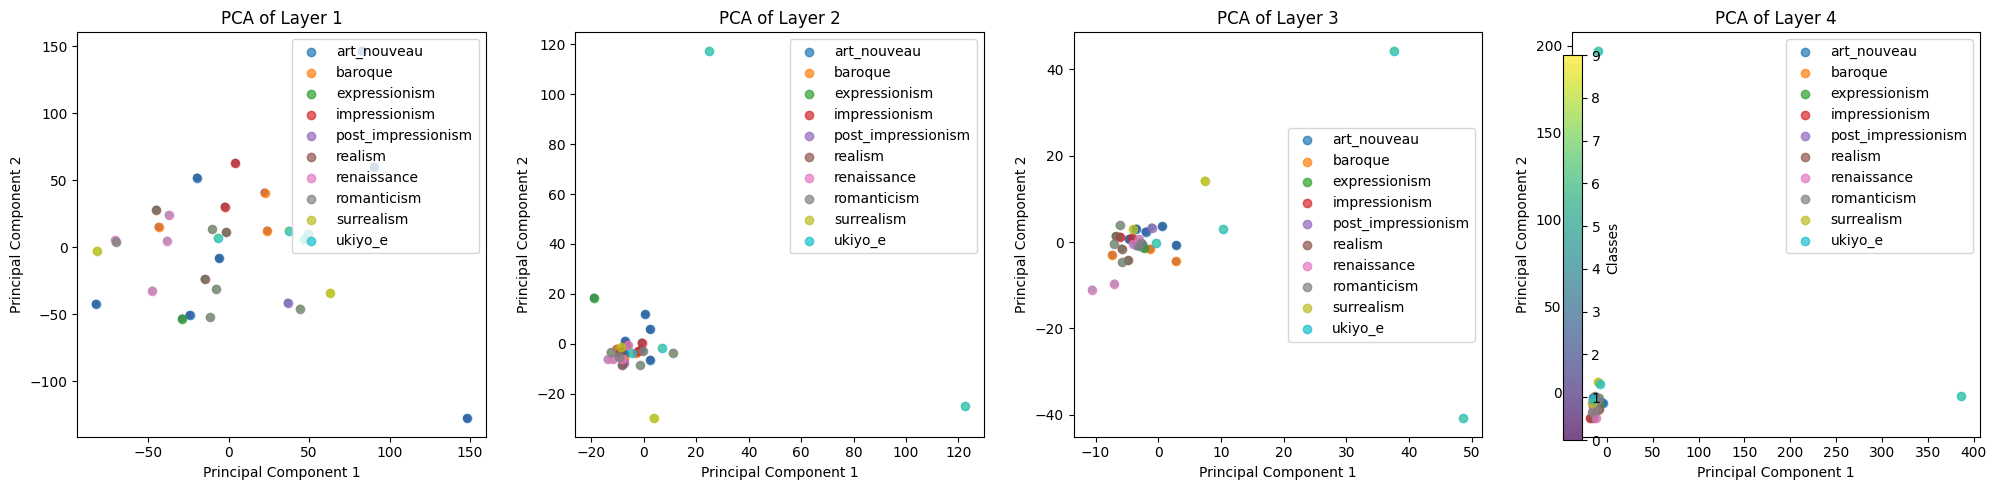

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you want to plot the first four layers
num_layers_to_plot = 4

# Set up a grid for subplots
fig, axes = plt.subplots(1, num_layers_to_plot, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    if i < len(flattened_features):
        layer_features = flattened_features[i]
        # Ensure the data is more than one-dimensional
        if layer_features.ndim > 1 and layer_features.shape[1] > 1:
            # Apply PCA
            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(layer_features)

            # Scatter plot for this layer
            scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', edgecolor='none', alpha=0.7)
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_title(f'PCA of Layer {i + 1}')

            # Create a legend with readable labels
            unique_labels = np.unique(labels)
            for unique_label in unique_labels:
                idx = labels == unique_label
                ax.scatter(pca_result[idx, 0], pca_result[idx, 1], label=class_names[unique_label.item()], alpha=0.7)
            ax.legend()
        else:
            ax.set_visible(False)
    else:
        ax.set_visible(False)

# Add a color bar outside the subplots
fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', label='Classes')

# Show the plot
plt.tight_layout()
plt.show()

# 8. t-SNE

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.016s...
[t-SNE] Computed neighbors for 32 samples in 0.751s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 99.214780
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.716206
[t-SNE] KL divergence after 300 iterations: 0.796855
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.009s...


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 32 samples in 0.358s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 53.034875
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.402802
[t-SNE] KL divergence after 300 iterations: 0.945236
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.004s...


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 32 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 25.253950
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.297455
[t-SNE] KL divergence after 300 iterations: 0.813429
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.002s...
[t-SNE] Computed neighbors for 32 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 50.420289


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.255283
[t-SNE] KL divergence after 300 iterations: 0.653688


/tmp/ipykernel_116/3634935107.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


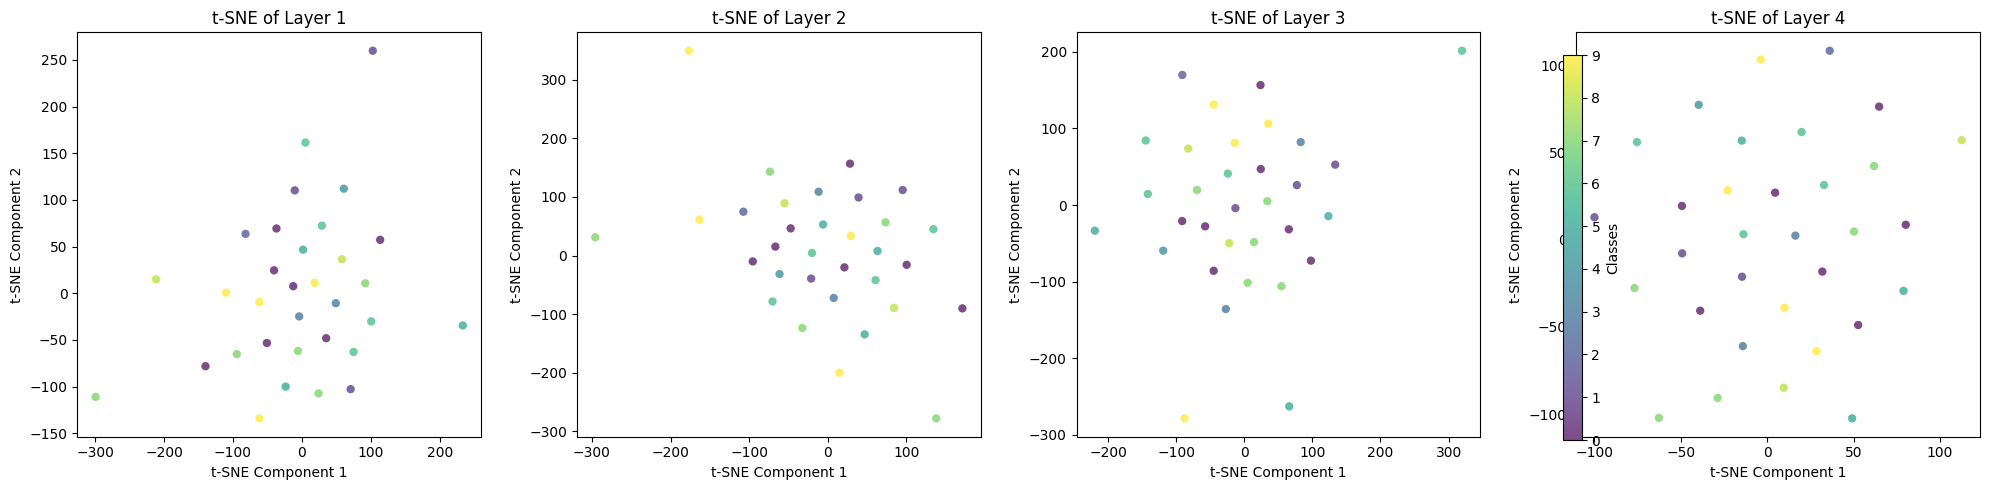

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have a limited number of layers to plot
num_layers_to_plot = 4  # Adjust this based on the number of layers you want to plot

# Set up the figure for subplots
fig, axes = plt.subplots(1, num_layers_to_plot, figsize=(20, 5))

for i, ax in enumerate(axes.flatten()):
    if i < len(flattened_features):
        features = flattened_features[i]

        # Initialize t-SNE
        tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)

        # Run t-SNE on the features
        tsne_results = tsne.fit_transform(features)

        # Scatter plot of the t-SNE components for this layer
        scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, edgecolor='none', alpha=0.7, cmap='viridis')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
        ax.set_title(f't-SNE of Layer {i + 1}')
    else:
        ax.set_visible(False)

# Add a color bar outside the subplots
fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', label='Classes')

# Show the plot
plt.tight_layout()
plt.show()
